<a href="https://colab.research.google.com/github/deena19liebert/Deep-Learning-Techniques-Lab/blob/main/Logistic_Regression_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- AND Gate ---


,Input 1,Input 2,Predicted Output,Actual Output
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


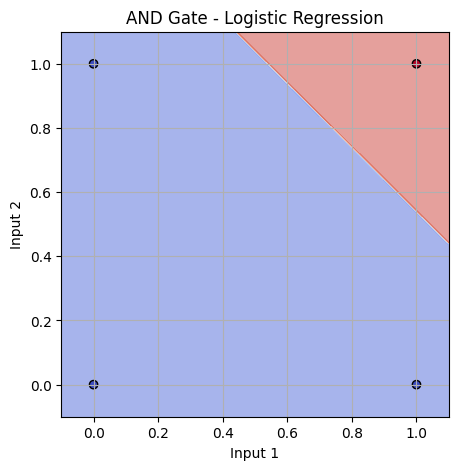


--- OR Gate ---


,Input 1,Input 2,Predicted Output,Actual Output
0,0,0,0,0
1,0,1,1,1
2,1,0,1,1
3,1,1,1,1


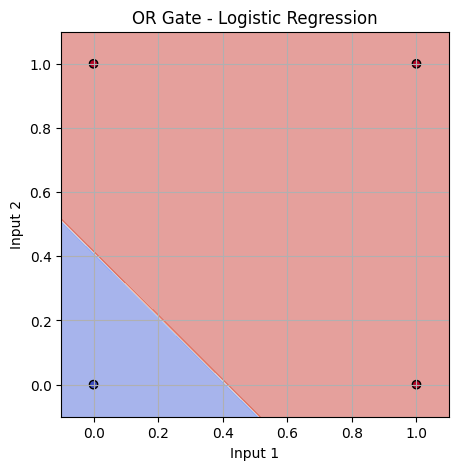


--- NOT Gate ---


,Input 1,Predicted Output,Actual Output
0,0,1,1
1,1,0,0


Skipping plot for NOT (only 1D input)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LogisticRegression:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(model)

            # Gradient Descent
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(model)
        return np.where(y_pred >= 0.5, 1, 0)

def get_logic_data(gate):
    if gate == "AND":
        X = np.array([[0,0], [0,1], [1,0], [1,1]])
        y = np.array([0, 0, 0, 1])
    elif gate == "OR":
        X = np.array([[0,0], [0,1], [1,0], [1,1]])
        y = np.array([0, 1, 1, 1])
    elif gate == "NOT":
        X = np.array([[0], [1]])
        y = np.array([1, 0])  # ~x
    else:
        raise ValueError("Only AND, OR, NOT are supported for logistic regression.")
    return X, y

def run_logistic_regression(gate_name):
    print(f"\n--- {gate_name} Gate ---")
    X, y = get_logic_data(gate_name)

    model = LogisticRegression(lr=0.1, epochs=2000)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Show table
    df = pd.DataFrame(X, columns=["Input 1"] if X.shape[1]==1 else ["Input 1", "Input 2"])
    df["Predicted Output"] = y_pred
    df["Actual Output"] = y
    display(df)

    return X, y, y_pred, model

def plot_decision_boundary(X, y, model, gate_name):
    if X.shape[1] != 2:
        print(f"Skipping plot for {gate_name} (only 1D input)")
        return

    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, preds, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(f"{gate_name} Gate - Logistic Regression")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)
    plt.show()

for gate in ["AND", "OR", "NOT"]:
    X, y, y_pred, model = run_logistic_regression(gate)
    plot_decision_boundary(X, y, model, gate)
